In [108]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import sys
import csv
import seaborn as sb
from collections import OrderedDict

csv.field_size_limit(sys.maxsize)
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words("english")

labels = ['fake', 'real']

#Snowballstemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

news_data = pd.read_csv('WELFake_Dataset.csv', engine='python', encoding='utf-8', on_bad_lines='skip').fillna('')

news_data_smaller = news_data.sample(n=10).reset_index(drop=True)

#uncomment for all data
news_data = news_data_smaller

word_occurence = {}
word_occurence_false = {}
word_occurence_true = {}

def remove_punctuation(some_string):
    unpuncted_string = some_string.translate(str.maketrans("","",string.punctuation))
    return(unpuncted_string)

def apply_stemming(some_string):
    new_list = []
    for word in some_string.split():
        word = stemmer.stem(word)
        new_list.append(word)
    return(new_list)

news_data["title"] = news_data["title"].apply(lambda x: " ".join([word for word in str(x).lower().split() if word not in (stop_words)]))
news_data["title"] = news_data["title"].apply(remove_punctuation)
news_data["title"] = news_data["title"].apply(apply_stemming)

news_data["text"] = news_data["text"].apply(lambda x: " ".join([word for word in str(x).lower().split() if word not in (stop_words)]))
news_data["text"] = news_data["text"].apply(remove_punctuation)
news_data["text"] = news_data["text"].apply(apply_stemming)

print(news_data["text"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [first, half, debat, donald, trump, seem, bog,...
1    [lambert, strether, corrent, tppttiptisa, tpp,...
2    [albuquerqu, —, two, full, day, deliber, juri,...
3    [glow, review, gave, miss, usa, kara, mccullou...
4    [rodney, sumter, three, gunshot, wound, includ...
5    [austin, texa, reuter, us, district, judg, aus...
6    [washington, post, report, donald, trump, rais...
7    [7, wikileak, hillari, revel, media, won't, co...
8    [million, american, head, poll, cast, ballot, ...
9    [“syria, children, like, children, anywher, el...
Name: text, dtype: object


In [109]:
print(news_data["title"][0])
print(news_data["text"][0])

['howard', 'dean', 'roast', 'trump', 'debat', 'sniffl', 'coke', 'user', 'tweet']
['first', 'half', 'debat', 'donald', 'trump', 'seem', 'bog', 'distract', 'sniffl', 'peddl', 'week', 'lucrat', 'conspiraci', 'hillari', 'clinton', 'sick', 'commanderinchief', 'one', 'must', 'ask', 'trump', 'stop', 'sniffl', 'sick', 'hold', 'back', 'tear', 'after', 'pummel', 'clintonhoward', 'dean', 'former', 'head', 'dnc', 'presidenti', 'candid', 'unconvent', 'answer', 'drugsdean', 'contributor', 'msnbc', 'tweet', 'last', 'nightnotic', 'trump', 'snif', 'time', 'coke', 'user', 'howard', 'dean', 'govhowarddean', 'septemb', '27', '2016trump', 'support', 'took', 'twitter', 'express', 'outrag', 'complet', 'forget', 'prefer', 'candid', 'spent', 'week', 'fuel', 'sexist', 'attack', 'clinton', 'stamina', 'abil', 'hey', 'get', 'offend', 'dean', 'point', 'could', 'obvious', 'all', 'trump', 'protect', 'cocain', 'traffick', 'serv', 'proper', 'jail', 'time', 'pull', 'string', 'justic', 'systemand', 'consid', 'releas', 'm

In [110]:
for sentence, label in zip(news_data["text"], news_data["label"]):
  for word in sentence:
    if label == 1:
      if word in word_occurence_true:
        word_occurence_true[word] += 1
      else:
        word_occurence_true[word] = 1
    else:
      if word in word_occurence_false:
        word_occurence_false[word] += 1
      else:
        word_occurence_false[word] = 1


    if word in word_occurence:
      word_occurence[word] += 1
    else:
      word_occurence[word] = 1

word_occurence = dict(sorted(word_occurence.items(), key=lambda item: item[1], reverse=True))

word_occurence_top = {k: word_occurence[k] for k in list(word_occurence)[:10]}
word_occurence_false







{'albuquerqu': 3,
 '—': 5,
 'two': 7,
 'full': 1,
 'day': 4,
 'deliber': 1,
 'juri': 3,
 'announc': 3,
 'tuesday': 1,
 'fail': 3,
 'reach': 2,
 'verdict': 1,
 'murder': 2,
 'trial': 5,
 'former': 3,
 'polic': 11,
 'offic': 22,
 '2014': 3,
 'shoot': 9,
 'death': 1,
 'homeless': 1,
 'man': 2,
 'paranoid': 1,
 'schizophrenia': 1,
 '“polic': 2,
 'difficult': 1,
 'job”': 1,
 'special': 1,
 'prosecutor': 3,
 'randi': 1,
 'mcginn': 6,
 'said': 28,
 '“the': 4,
 'discuss': 4,
 'need': 4,
 'communiti': 3,
 'is': 1,
 'want': 2,
 'dirti': 1,
 'harri': 1,
 'peac': 1,
 '”': 17,
 'poll': 1,
 'six': 2,
 'men': 2,
 'women': 1,
 'judg': 5,
 'alisa': 1,
 'hadfield': 2,
 'declar': 3,
 'mistrial': 1,
 'immedi': 2,
 'clear': 1,
 'would': 5,
 'seek': 2,
 'anoth': 1,
 'keith': 1,
 'sandi': 10,
 'dominiqu': 1,
 'perez': 12,
 'face': 2,
 'charg': 4,
 'jame': 1,
 'boyd': 13,
 'illeg': 3,
 'camp': 1,
 'craggi': 1,
 'mountainsid': 1,
 'citi': 3,
 'east': 1,
 'end': 1,
 'mr': 39,
 'also': 5,
 'lesser': 1,
 'aggrav'

In [111]:
word_array_x = []
word_array_fake = []
word_array_true = []

for word in word_occurence_top:
  if (word not in word_occurence_false):
    word_array_fake.append(0)
  else:
    word_array_fake.append(word_occurence_false[word])


  if (word not in word_occurence_true):
    word_array_true.append(0)
  else:
    word_array_true.append(word_occurence_true[word])

  word_array_x.append(word)


#word_occurence_true[:10]
#word_occurence_false[:10]

In [112]:
#news_data["label"].value_counts()

1    7
0    3
Name: label, dtype: int64

1    7
0    3
Name: label, dtype: int64

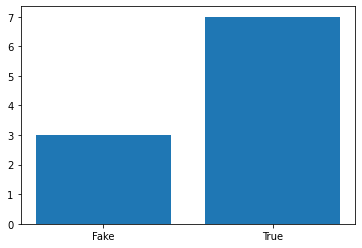

In [113]:
x = np.array(["Fake", "True"])
y = np.array([news_data['label'].value_counts()[0], news_data['label'].value_counts()[1]])

plt.bar(x,y)

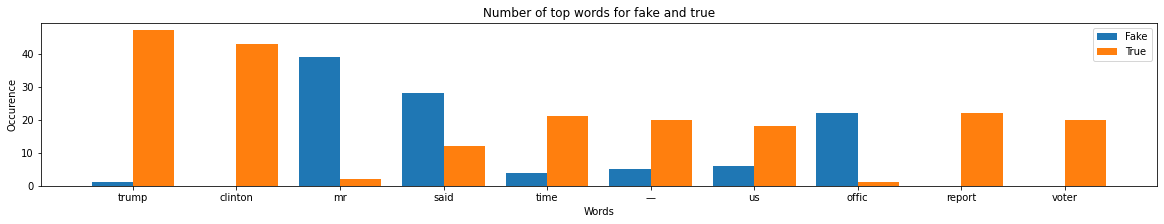

In [114]:
X_axis = np.arange(len(word_array_x))
plt.figure(figsize=(20, 3)) 
plt.bar(X_axis - 0.2, word_array_fake, 0.4, label = 'Fake')
plt.bar(X_axis + 0.2, word_array_true, 0.4, label = 'True')


plt.xticks(X_axis, word_array_x)
plt.xlabel("Words")
plt.ylabel("Occurence")
plt.title("Number of top words for fake and true")
plt.legend()
plt.show()

In [115]:
def bow_maker(some_list):
    bow = set()
    for word in some_list:
        numbr = some_list.count(word)
        bow.add((word, numbr))
    return(bow)

print(news_data["title"].apply(bow_maker)[0])

{('howard', 1), ('sniffl', 1), ('user', 1), ('tweet', 1), ('dean', 1), ('coke', 1), ('roast', 1), ('debat', 1), ('trump', 1)}


In [116]:
word_frequency = {}
wordPerLine = {}
allwordsAmount = {}
allTokens = []
counter = 0
for line in news_data["text"]:
    #print(line)
    for token in line:
        if token not in wordPerLine.keys():
            wordPerLine[token] = 1
            allwordsAmount[token] = 1
            if token not in allTokens:
              allTokens.append(token)
        else:
            wordPerLine[token] += 1
            allwordsAmount[token] += 1
    word_frequency[counter] = wordPerLine
    wordPerLine = {}
    counter = counter +1

bowResults = []
for line in news_data["text"]:
    vector=[]
    for w in allTokens:
        vector.append(line.count(w))
    print(vector)
    bowResults.append(vector) 

[1, 1, 2, 1, 8, 1, 1, 1, 3, 1, 2, 1, 2, 2, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 